In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('Zip_MHINC_Pop.csv')

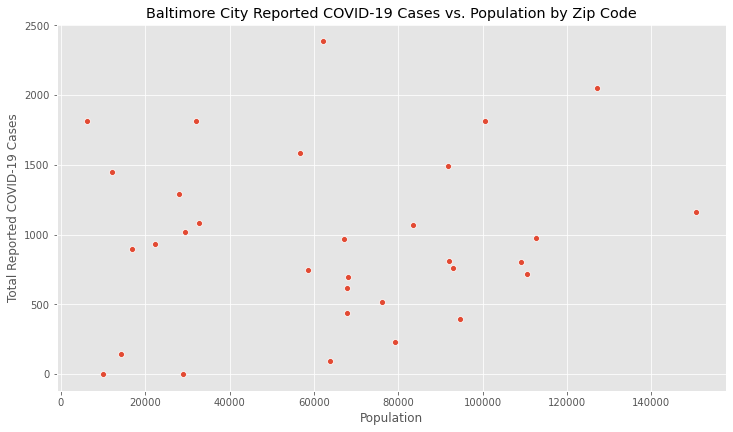

[[1.         0.10279733]
 [0.10279733 1.        ]]


In [3]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=df,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()

corr = np.corrcoef(df[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [4]:
labelList = []

for index, row in df.iterrows():
    if row['Pop2010'] > 65000:
        labelList.append('>65k')
    else:
        labelList.append('<65k')
        
df['classLabel'] = labelList

X_train, X_test, y_train, y_test = \
    train_test_split(df[['Pop2010','TotalCases']],\
                     df['classLabel'],test_size=0.5,\
                         random_state=21,stratify=df['classLabel'])

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('\n')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n')
print(score)
print('\n')



['>65k' '>65k' '>65k' '>65k' '>65k' '<65k' '>65k' '<65k' '>65k' '>65k'
 '>65k' '>65k' '>65k' '<65k' '<65k' '>65k']


0.8125


